In [1]:
# adding an Identity Matrix to a zero matrix promotes rank from 0 to 3
A = zeros(3,3)

3×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [2]:
using LinearAlgebra

In [5]:
rank(A)

0

In [3]:
A + I

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [4]:
rank(A+I)

3

In [6]:
# Promote a rank 2 matrix to rank 3
B = [1 3 -19;5 -7 59;-5 2 -24]

3×3 Matrix{Int64}:
  1   3  -19
  5  -7   59
 -5   2  -24

In [7]:
rank(B)

2

In [8]:
B + 0.01I

3×3 Matrix{Float64}:
  1.01   3.0   -19.0
  5.0   -6.99   59.0
 -5.0    2.0   -23.99

In [9]:
rank(B + 0.01I)

3

In [10]:
# A too large scalar on the identity matrix can cause noise
# the matrix is overshadowed by an identity matrix
B + 1000I

3×3 Matrix{Int64}:
 1001    3  -19
    5  993   59
   -5    2  976

In [11]:
# the trick is to make a matrix full-rank, but to alter the information inside the matrix as little as possible

In [12]:
# This addition of a scalar*I is sometimes called regularisation

In [19]:
# another example - random integers in a 30x30 matrix
m = 30;
r(x) = round(Int, x)
A = r.(randn(m,m))
A = A * A'

30×30 Matrix{Int64}:
  32   -1  -16    1  -2  -6   10   -4  …   4    6    7   10   1   0   8   -7
  -1   56   10    7  -2  -3    8   12     14  -14  -10  -12   0  -6  11    5
 -16   10   24   -1   4   2   -9    5      3   -6   -9   -3  -6   0  -1   -1
   1    7   -1   45   8   6    9  -13      1   -1    2    6  11   0   9    8
  -2   -2    4    8  39  -1   11   -5     -1    0    5   -6   1  -6  15    0
  -6   -3    2    6  -1  35   -4   -4  …  -8    0    3    7  10   2   1    4
  10    8   -9    9  11  -4   34   -7      1   -5    1    3   8  -2  11   12
  -4   12    5  -13  -5  -4   -7   55      8   -6  -14    3  -6  -2  -4    4
  -1   -6    0   -3  -6  -2  -11   10      2    4    3   -7   4  -2  -3    2
  -1  -11    0    6   1   4    6   -3      1   -5   -4    5   7   2   0   -6
   7    6   -4    6  -5   2    5    1  …   0    6   -4   14  10   0   7    6
   3    0   -7    1   8   8   12   -5     -8    3    4    5   9  -3  13   16
   1    3    4   11  -5   8   -4   -1      7   -2    7 

In [20]:
# rank is 30
rank(A)

30

In [22]:
# reduce rank
A[:,2] = A[:,1];

In [23]:
rank(A)

29

In [24]:
# shifting factor (λ)
λ = 0.01

0.01

In [26]:
# Shifting matrix
B = A + λ*I

30×30 Matrix{Float64}:
  32.01   32.0   -16.0     1.0   …   10.0    1.0    0.0    8.0    -7.0
  -1.0    -0.99   10.0     7.0      -12.0    0.0   -6.0   11.0     5.0
 -16.0   -16.0    24.01   -1.0       -3.0   -6.0    0.0   -1.0    -1.0
   1.0     1.0    -1.0    45.01       6.0   11.0    0.0    9.0     8.0
  -2.0    -2.0     4.0     8.0       -6.0    1.0   -6.0   15.0     0.0
  -6.0    -6.0     2.0     6.0   …    7.0   10.0    2.0    1.0     4.0
  10.0    10.0    -9.0     9.0        3.0    8.0   -2.0   11.0    12.0
  -4.0    -4.0     5.0   -13.0        3.0   -6.0   -2.0   -4.0     4.0
  -1.0    -1.0     0.0    -3.0       -7.0    4.0   -2.0   -3.0     2.0
  -1.0    -1.0     0.0     6.0        5.0    7.0    2.0    0.0    -6.0
   7.0     7.0    -4.0     6.0   …   14.0   10.0    0.0    7.0     6.0
   3.0     3.0    -7.0     1.0        5.0    9.0   -3.0   13.0    16.0
   1.0     1.0     4.0    11.0        2.0   -1.0    6.0   -7.0    -2.0
   ⋮                             ⋱    ⋮               

In [27]:
println("Rank without shifting is $(rank(A))")
println("Rank with    shifting is $(rank(B))")

Rank without shifting is 29
Rank with    shifting is 30


In [29]:
using Plots; gr()

Plots.GRBackend()

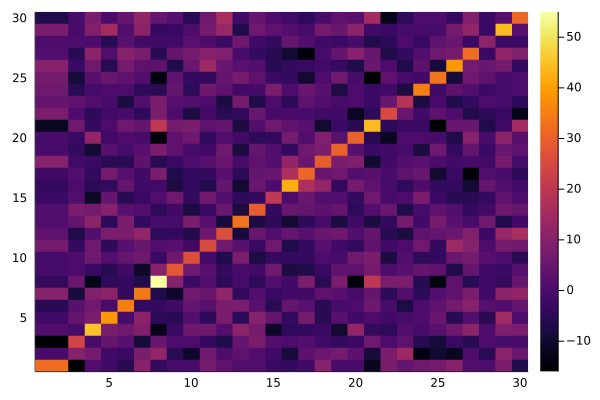

In [30]:
# illustrating identity matrix giving full rank
heatmap(B)